# Clustering Assignment 1
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and 
identify the number of clusters formed and draw inferences.
Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
## EDA
list(df)

['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape']

In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


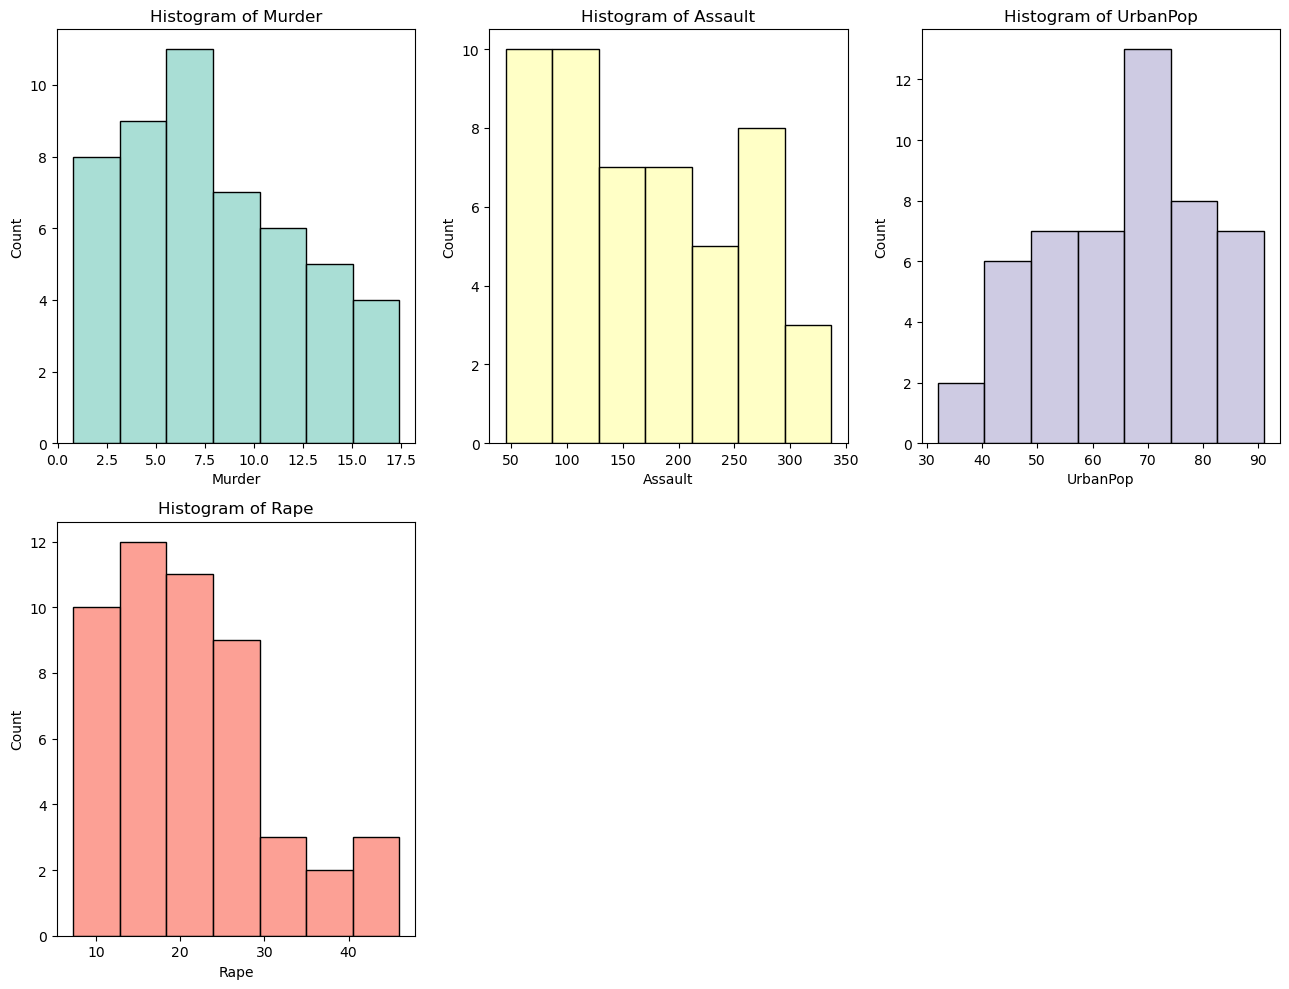

In [7]:
## histogram---
hisplot = ['Murder', 'Assault', 'UrbanPop', 'Rape']
plt.figure(figsize=(13, 10))
colors = sns.color_palette("Set3", len(hisplot))
for i, (column, color) in enumerate(zip(hisplot, colors), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], color=color)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

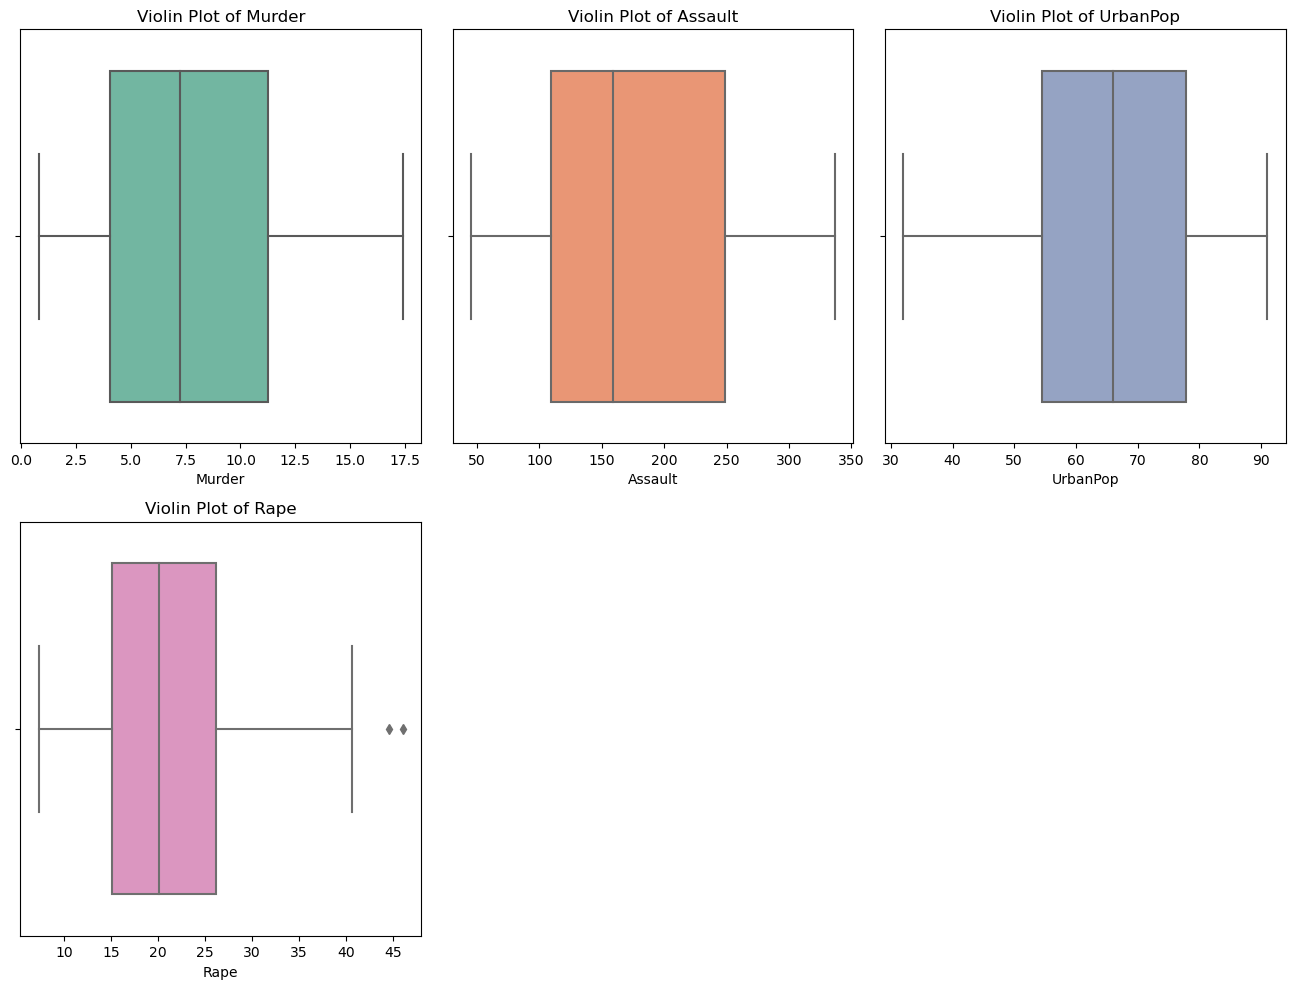

In [8]:
###--- box plot---
boxplot = ['Murder', 'Assault', 'UrbanPop', 'Rape']
plt.figure(figsize=(13,10))
colors = sns.color_palette("Set2", len(boxplot))
for i, (column, color) in enumerate(zip(boxplot, colors), 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column], color=color)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

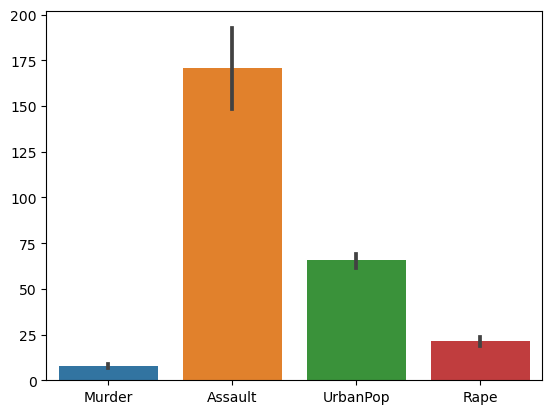

In [9]:
## -- bar plot --
sns.barplot(df)
plt.show()

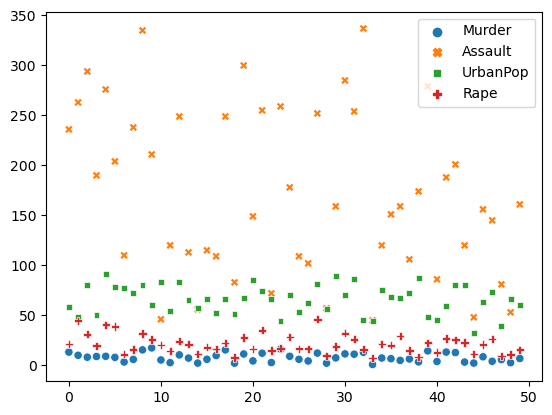

In [10]:
###-Scatter plot--
sns.scatterplot(df)
plt.show()

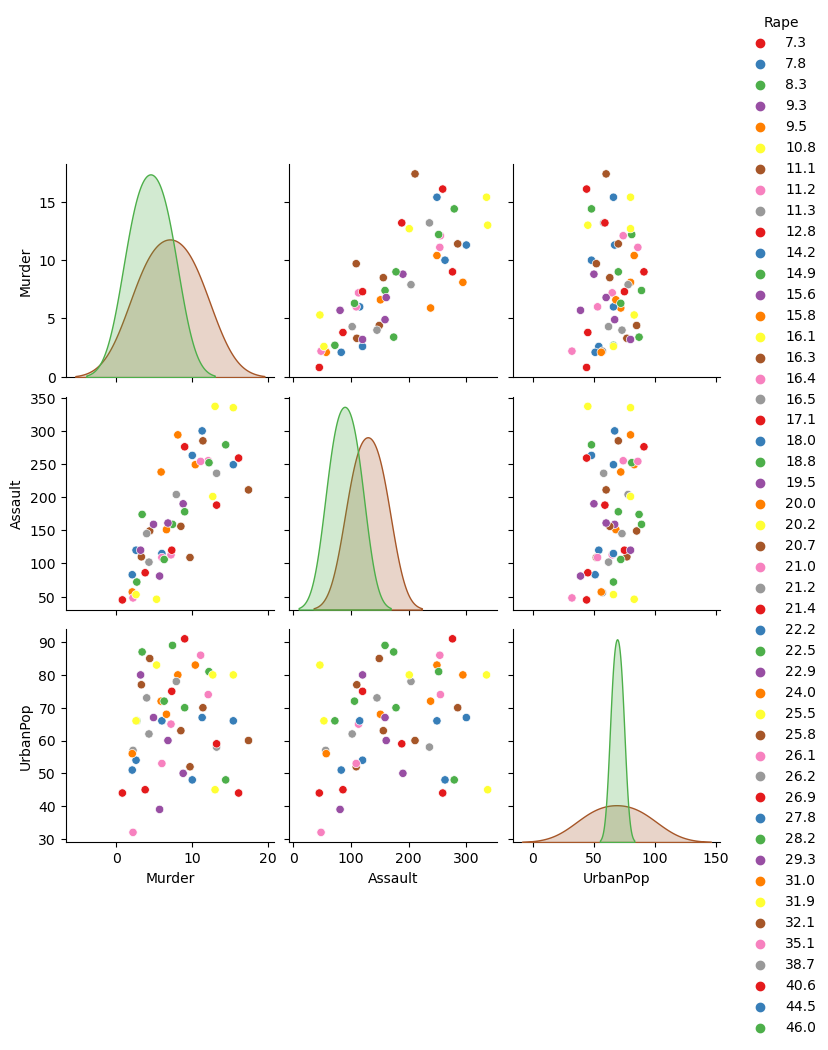

In [11]:
###---pair plot--
sns.pairplot(df, hue='Rape', palette='Set1')
plt.show()

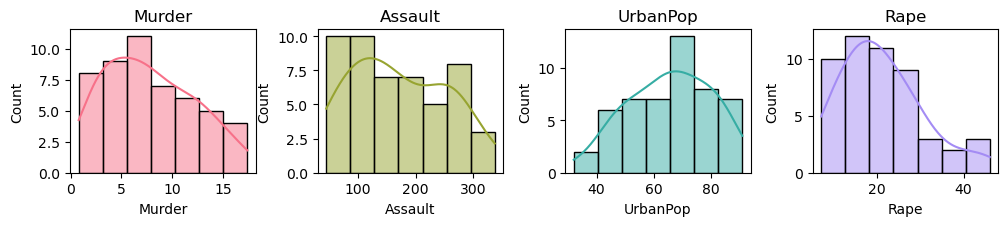

In [12]:
###--distribution-plots--
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
colors = sns.color_palette("husl", len(numerical_columns))
for i, (column, color) in enumerate(zip(numerical_columns, colors), 1):
    plt.subplot(5, 6, i)
    sns.histplot(df[column], kde=True, color=color)
    plt.title(column)
plt.tight_layout()
plt.show()

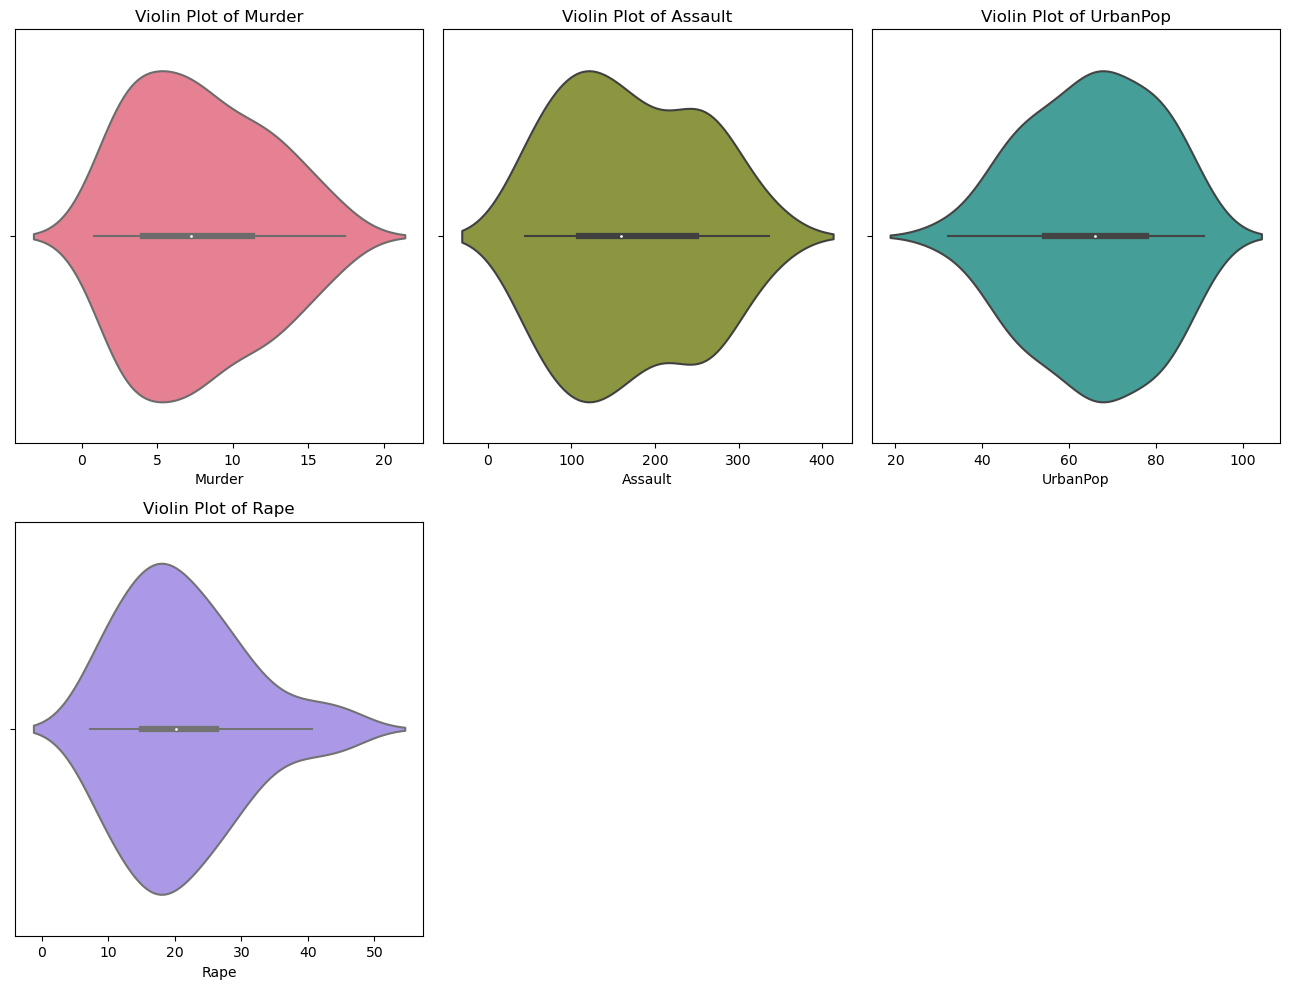

In [13]:
###-- violin plots--
vplot = ['Murder', 'Assault', 'UrbanPop', 'Rape']
plt.figure(figsize=(13,10))
colors = sns.color_palette("husl", len(vplot))
for i, (column, color) in enumerate(zip(vplot, colors), 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=df[column], color=color)
    plt.title(f'Violin Plot of {column}')
plt.tight_layout()
plt.show()

In [14]:
##-- X-- variable- taking x variables
x=df.iloc[:,1:]

In [15]:
print(x)

    Murder  Assault  UrbanPop  Rape
0     13.2      236        58  21.2
1     10.0      263        48  44.5
2      8.1      294        80  31.0
3      8.8      190        50  19.5
4      9.0      276        91  40.6
5      7.9      204        78  38.7
6      3.3      110        77  11.1
7      5.9      238        72  15.8
8     15.4      335        80  31.9
9     17.4      211        60  25.8
10     5.3       46        83  20.2
11     2.6      120        54  14.2
12    10.4      249        83  24.0
13     7.2      113        65  21.0
14     2.2       56        57  11.3
15     6.0      115        66  18.0
16     9.7      109        52  16.3
17    15.4      249        66  22.2
18     2.1       83        51   7.8
19    11.3      300        67  27.8
20     4.4      149        85  16.3
21    12.1      255        74  35.1
22     2.7       72        66  14.9
23    16.1      259        44  17.1
24     9.0      178        70  28.2
25     6.0      109        53  16.4
26     4.3      102        6

In [16]:
###-- Standardization--&-- converting into data frames
SS=StandardScaler()
SS_X=SS.fit_transform(x)
pd.DataFrame(SS_X)

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [17]:
###-- K-means-clustering--
x, _ = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

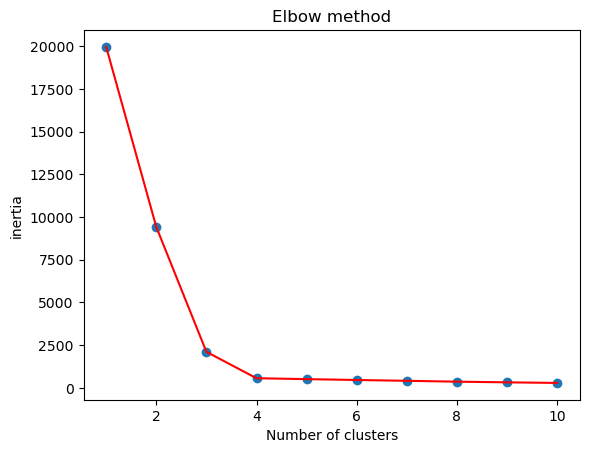

In [29]:
##-- Elbow method
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia_values.append(kmeans.inertia_)


plt.scatter(k_values,inertia_values)
plt.plot(k_values,inertia_values,color='red')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


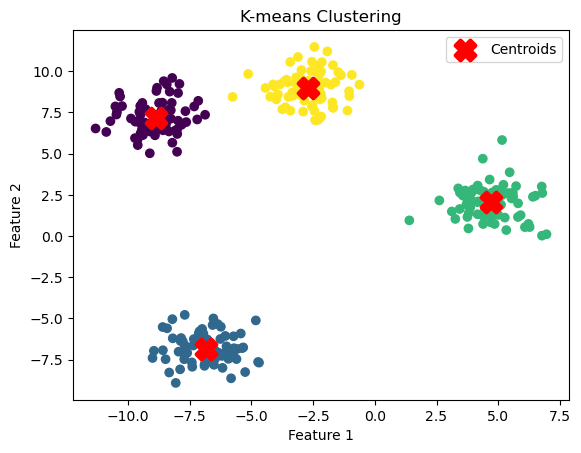

In [18]:
# Plot the results for k-means clustering
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [19]:
###--K-medoid-clustering--
kmedoids = KMedoids(n_clusters=4)
kmedoids.fit(x)
labels_medoids = kmedoids.labels_
medoids = x[kmedoids.medoid_indices_]

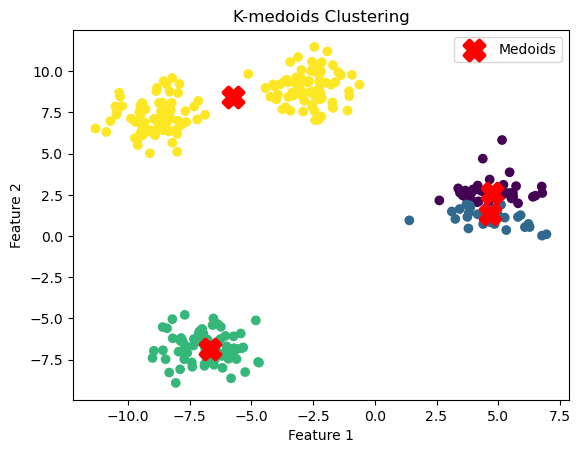

In [20]:
# Plot the results for k-medoid clustering
plt.scatter(x[:, 0], x[:, 1], c=labels_medoids, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], marker='X', s=200, linewidths=3, color='r', label='Medoids')
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [21]:
#---Agglomerative hierarchical clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglomerative.fit_predict(x)

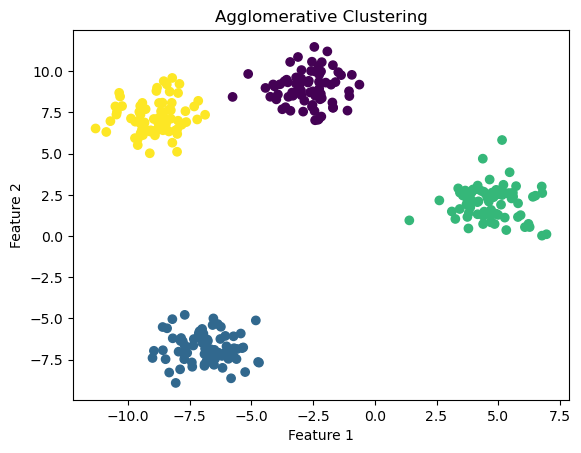

In [22]:
# Plot the results Hierarchical clustering
plt.scatter(x[:, 0], x[:, 1], c=labels_agglo, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

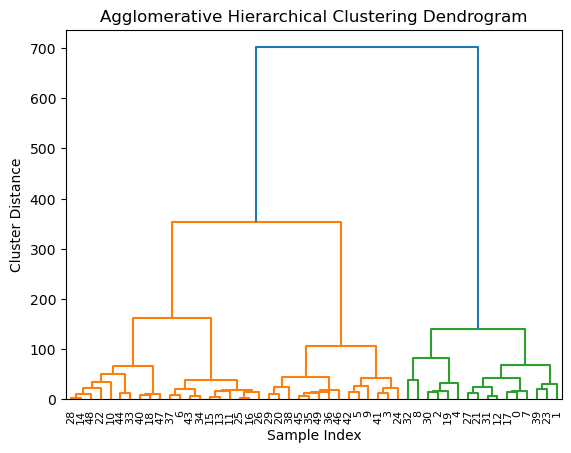

In [26]:
# Plot the dendrogram
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]
linked = linkage(numeric_df, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()


In [27]:
##---DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(x)

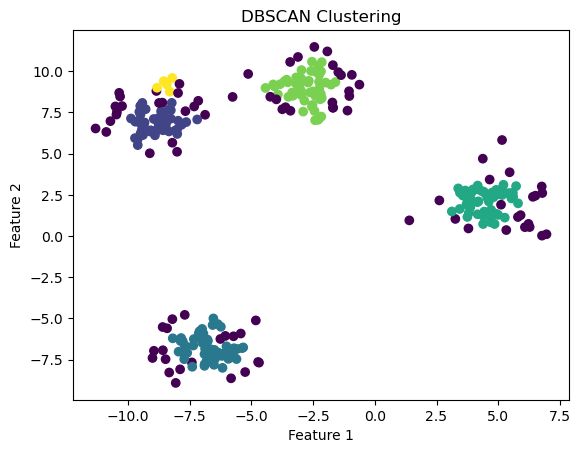

In [28]:
# Plot the results
plt.scatter(x[:, 0], x[:, 1], c=labels_dbscan, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()